# Creating a Product based Recommender System with the help of Correlation.

In [2]:
import pandas as pd
import numpy as np

In [3]:
combined=pd.read_csv("Combined.csv")

In [4]:
combined.head()

,Unnamed: 0,order_id,customer_unique_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_lat,seller_lng,customer_city,customer_state,customer_lat,customer_lng,order_delivered_customer_time,dist,product_category_name_english,review_score
0,0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,4244733e06e7ecb4970a6e2683c13e61,...,-22.498183,-44.123614,campos dos goytacazes,RJ,-21.758076,-41.312633,104972,301.005664,기타,5.0
1,1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1.0,e5f2d52b802189ee658865ca93d83a8f,...,-23.566258,-46.518417,santa fe do sul,SP,-20.212393,-50.941471,696564,589.274140,유아/애완용품,4.0
2,2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1.0,c777355d18b72b67abbeef9df44fd0fd,...,-22.264094,-46.158564,para de minas,MG,-19.860439,-44.597972,520948,312.495046,가구/인테리어,5.0
3,3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1.0,7634da152a4610f1595efa32f14722fc,...,-20.548228,-47.395897,atibaia,SP,-23.144923,-46.539830,345879,301.951753,뷰티/건강,4.0
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1.0,ac6c3623068f30de03045865e4e10089,...,-22.931427,-53.133759,varzea paulista,SP,-23.249008,-46.824961,1148182,646.221788,가구/인테리어,5.0


In [5]:
combined.shape

(84096, 29)

In [6]:
df1=pd.read_csv("combined.csv",usecols=['product_id','customer_unique_id','product_category_name_english','review_score'])

In [7]:
df1

,customer_unique_id,product_id,product_category_name_english,review_score
0,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,기타,5.0
1,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,유아/애완용품,4.0
2,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,가구/인테리어,5.0
3,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,뷰티/건강,4.0
4,58dbd0b2d70206bf40e62cd34e84d795,ac6c3623068f30de03045865e4e10089,가구/인테리어,5.0
...,...,...,...,...
84091,4d3abb73ceb86353aeadbe698aa9d5cb,43423cdffde7fda63d0414ed38c11a73,패션/액세서리,4.0
84092,11a0e041ea6e7e21856d2689b64e7f3a,6f0169f259bb0ff432bfff7d829b9946,기타,5.0
84093,84c5d4fbaf120aae381fad077416eaa0,32e07fd915822b0765e448c4dd74c828,전자제품/기술,5.0
84094,29309aa813182aaddc9b259e31b870e6,72a30483855e2eafc67aee5dc2560482,스포츠/야외 활동,5.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [9]:
df1.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).head()

product_category_name_english
도서/교육        4.474178
식품/음료        4.244643
뷰티/건강        4.194216
유아/애완용품      4.168045
스포츠/야외 활동    4.166134
Name: review_score, dtype: float64

In [10]:
df1.groupby('product_category_name_english')['review_score'].count().sort_values(ascending=False).head()

product_category_name_english
전자제품/기술    17281
가구/인테리어    14885
뷰티/건강      12795
패션/액세서리     9415
유아/애완용품     8825
Name: review_score, dtype: int64

In [11]:
reviews = pd.DataFrame(df1.groupby('product_category_name_english')['review_score'].mean())
reviews.head()

,review_score
product_category_name_english,
가구/인테리어,3.941014
기타,4.100023
도서/교육,4.474178
미디어/엔터테인먼트,4.154762
뷰티/건강,4.194216


In [12]:
reviews['num of reviews'] = pd.DataFrame(df1.groupby('product_category_name_english')['review_score'].count())
reviews.head()

,review_score,num of reviews
product_category_name_english,,
가구/인테리어,3.941014,14885
기타,4.100023,8628
도서/교육,4.474178,852
미디어/엔터테인먼트,4.154762,1260
뷰티/건강,4.194216,12795


Let's explore the data a bit and get a look at some of the best review product.

<Axes: >

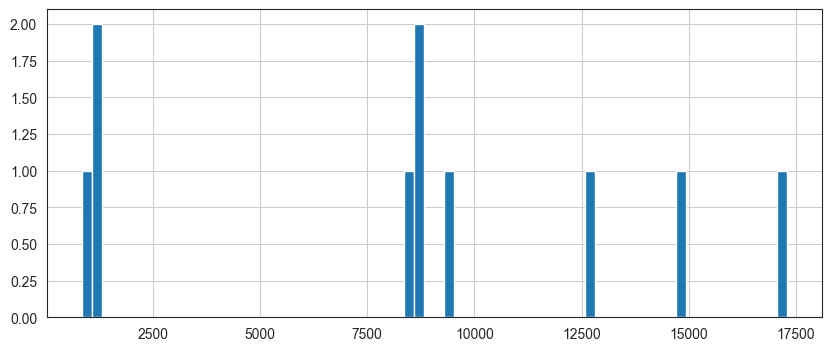

In [13]:
plt.figure(figsize=(10,4))
reviews['num of reviews'].hist(bins=70)

<Axes: >

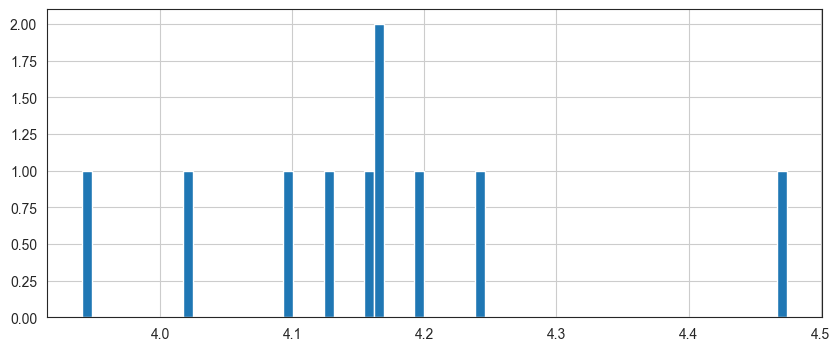

In [14]:
plt.figure(figsize=(10,4))
reviews['review_score'].hist(bins=70)

Now that we have a general idea of what the data looks like,

# Recommending Similar Product

Create a matrix that has the customer unique id on one access and the product_category_name english on another axis. Each cell will then consist of the review the customer gave to that product there will be a lot of NaN values, because most people have not review most of the product

In [15]:
df2 = df1.pivot_table(index='customer_unique_id',columns='product_category_name_english',values='review_score')
df2.head()

product_category_name_english,가구/인테리어,기타,도서/교육,미디어/엔터테인먼트,뷰티/건강,스포츠/야외 활동,식품/음료,유아/애완용품,전자제품/기술,패션/액세서리
customer_unique_id,,,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
000161a058600d5901f007fab4c27140,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
0001fd6190edaaf884bcaf3d49edf079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
0002414f95344307404f0ace7a26f1d5,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0004164d20a9e969af783496f3408652,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


Most reviewed product:

In [16]:
reviews.sort_values('num of reviews',ascending=False).head(10)

,review_score,num of reviews
product_category_name_english,,
전자제품/기술,4.021584,17281
가구/인테리어,3.941014,14885
뷰티/건강,4.194216,12795
패션/액세서리,4.129899,9415
유아/애완용품,4.168045,8825
기타,4.100023,8628
스포츠/야외 활동,4.166134,8445
미디어/엔터테인먼트,4.154762,1260
식품/음료,4.244643,1120


In [18]:
bedbath_user_reviews = df2['가구/인테리어']
telephony_user_reviews = df2['미디어/엔터테인먼트']
bedbath_user_reviews.head()

customer_unique_id
00012a2ce6f8dcda20d059ce98491703   NaN
000161a058600d5901f007fab4c27140   NaN
0001fd6190edaaf884bcaf3d49edf079   NaN
0002414f95344307404f0ace7a26f1d5   NaN
0004164d20a9e969af783496f3408652   NaN
Name: 가구/인테리어, dtype: float64

## We can then use corrwith() method to get correlations between two pandas series:

In [19]:
similar_to_bedbath = df2.corrwith(bedbath_user_reviews)
similar_to_telephony = df2.corrwith(telephony_user_reviews)

/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/anaconda3/envs/tf_env/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


clean this by removing NaN values and using a DataFrame instead of a series

In [20]:
corr_bedbath = pd.DataFrame(similar_to_bedbath,columns=['Correlation'])
corr_bedbath.dropna(inplace=True)
corr_bedbath.head()

,Correlation
product_category_name_english,
가구/인테리어,1.0
기타,1.0
뷰티/건강,1.0
스포츠/야외 활동,1.0
유아/애완용품,1.0


we can sort the dataframe by correlation, we should get the most similar products, however we get some results that don't really make sense. This is because there are a lot of products only reviewed once by customer who also reviewed bed bath table (it was the most popular product).

In [21]:
corr_bedbath.sort_values('Correlation',ascending=False).head(10)

,Correlation
product_category_name_english,
기타,1.0
뷰티/건강,1.0
스포츠/야외 활동,1.0
유아/애완용품,1.0
전자제품/기술,1.0
가구/인테리어,1.0
패션/액세서리,1.0


In [22]:
corr_bedbath = corr_bedbath.join(reviews['num of reviews'])
corr_bedbath.head()

,Correlation,num of reviews
product_category_name_english,,
가구/인테리어,1.0,14885
기타,1.0,8628
뷰티/건강,1.0,12795
스포츠/야외 활동,1.0,8445
유아/애완용품,1.0,8825


# Recommendation based on product correlated with bed bath table product

filtering out products that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [23]:
corr_bedbath[corr_bedbath['num of reviews']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of reviews
product_category_name_english,,
기타,1.0,8628
뷰티/건강,1.0,12795
스포츠/야외 활동,1.0,8445
유아/애완용품,1.0,8825
전자제품/기술,1.0,17281


# Recommendation based on product correlated with Telephony product 

In [24]:
corr_telephony = pd.DataFrame(similar_to_telephony,columns=['Correlation'])
corr_telephony.dropna(inplace=True)
corr_telephony = corr_telephony.join(reviews['num of reviews'])
corr_telephony[corr_telephony['num of reviews']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of reviews
product_category_name_english,,
미디어/엔터테인먼트,1.0,1260
스포츠/야외 활동,1.0,8445
기타,1.0,8628
유아/애완용품,1.0,8825
전자제품/기술,1.0,17281
